In [261]:
!pip install kaggle

zsh:1: /Users/strurphe/iim/python_and_ai/.venv/bin/pip: bad interpreter: /Users/strurphe/iim/calculs-matriciels/.venv/bin/python3: no such file or directory


In [262]:
!kaggle competitions list

/Users/strurphe/iim/python_and_ai/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
ref                                                                                deadline             category                reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2      2025-04-01 23:59:00  Featured         2,117,152 Usd        957           False  
https://www.kaggle.com/competitions/konwinski-prize                                2025-03-12 23:59:00  Featured         1,225,000 Usd        149           False  
https://www.kaggle.com/competitions/gemma-language-tuning    

In [263]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [264]:
df = pd.read_csv("advanced/train.csv")

In [265]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [266]:
y = df.SalePrice.to_numpy()
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [267]:
X = df.LotArea.to_numpy()
X

array([ 8450,  9600, 11250, ...,  9042,  9717,  9937])

<Axes: xlabel='LotArea'>

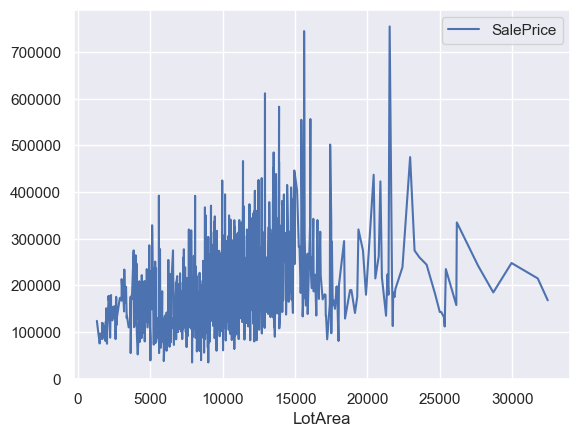

In [268]:
data = df[["LotArea", "SalePrice"]]
data.set_index("LotArea", inplace=True)
data = data.sort_index()
data = data.iloc[:-20]
data.plot()

In [269]:
from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

In [270]:
print(reg.coef_)
print(reg.score(X, y))

[[2.09997195]]
0.06961331538211202


In [271]:
test_data = np.array(range(30000))
y_pred = reg.predict(test_data.reshape(-1, 1))

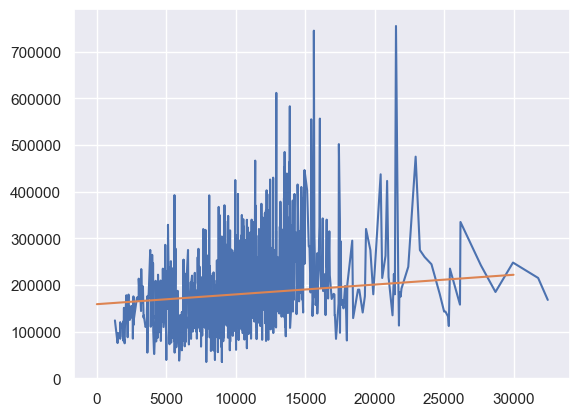

In [272]:
plt.plot(data.index, data)
plt.plot(test_data, y_pred)

# Arbres rigolos

In [273]:
import seaborn as sns

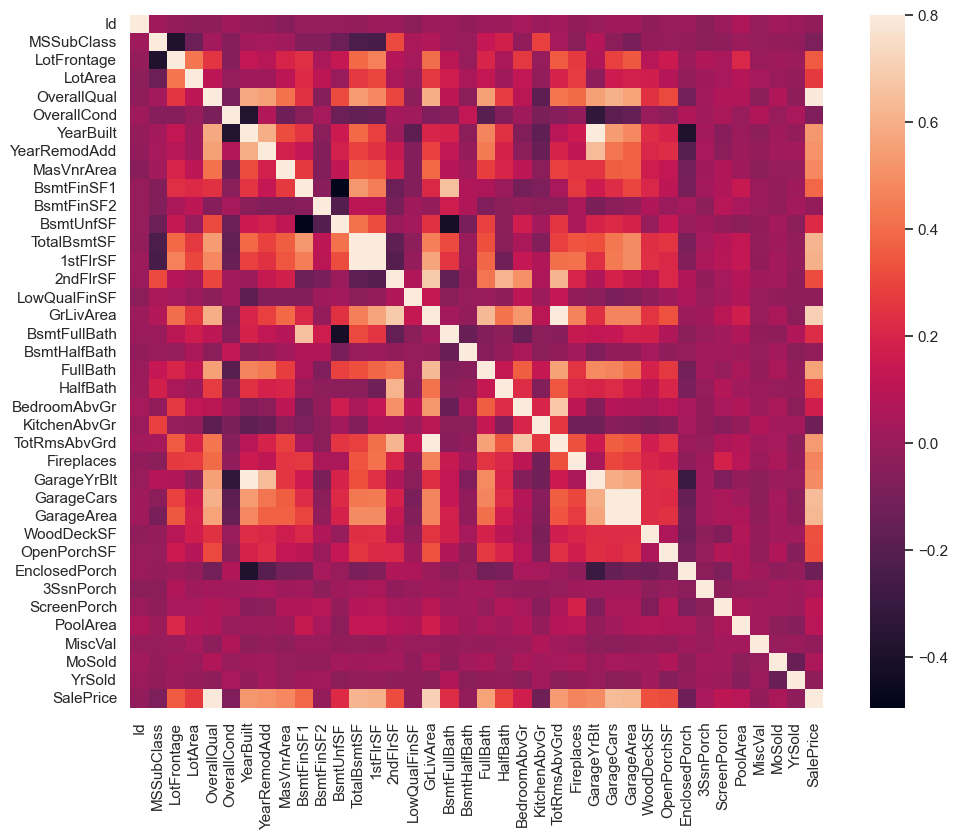

In [274]:
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

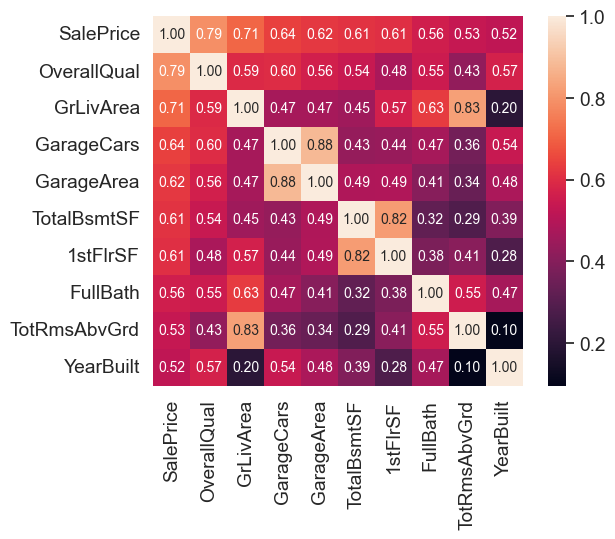

In [275]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/Users/strurphe/iim/python_and_ai/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


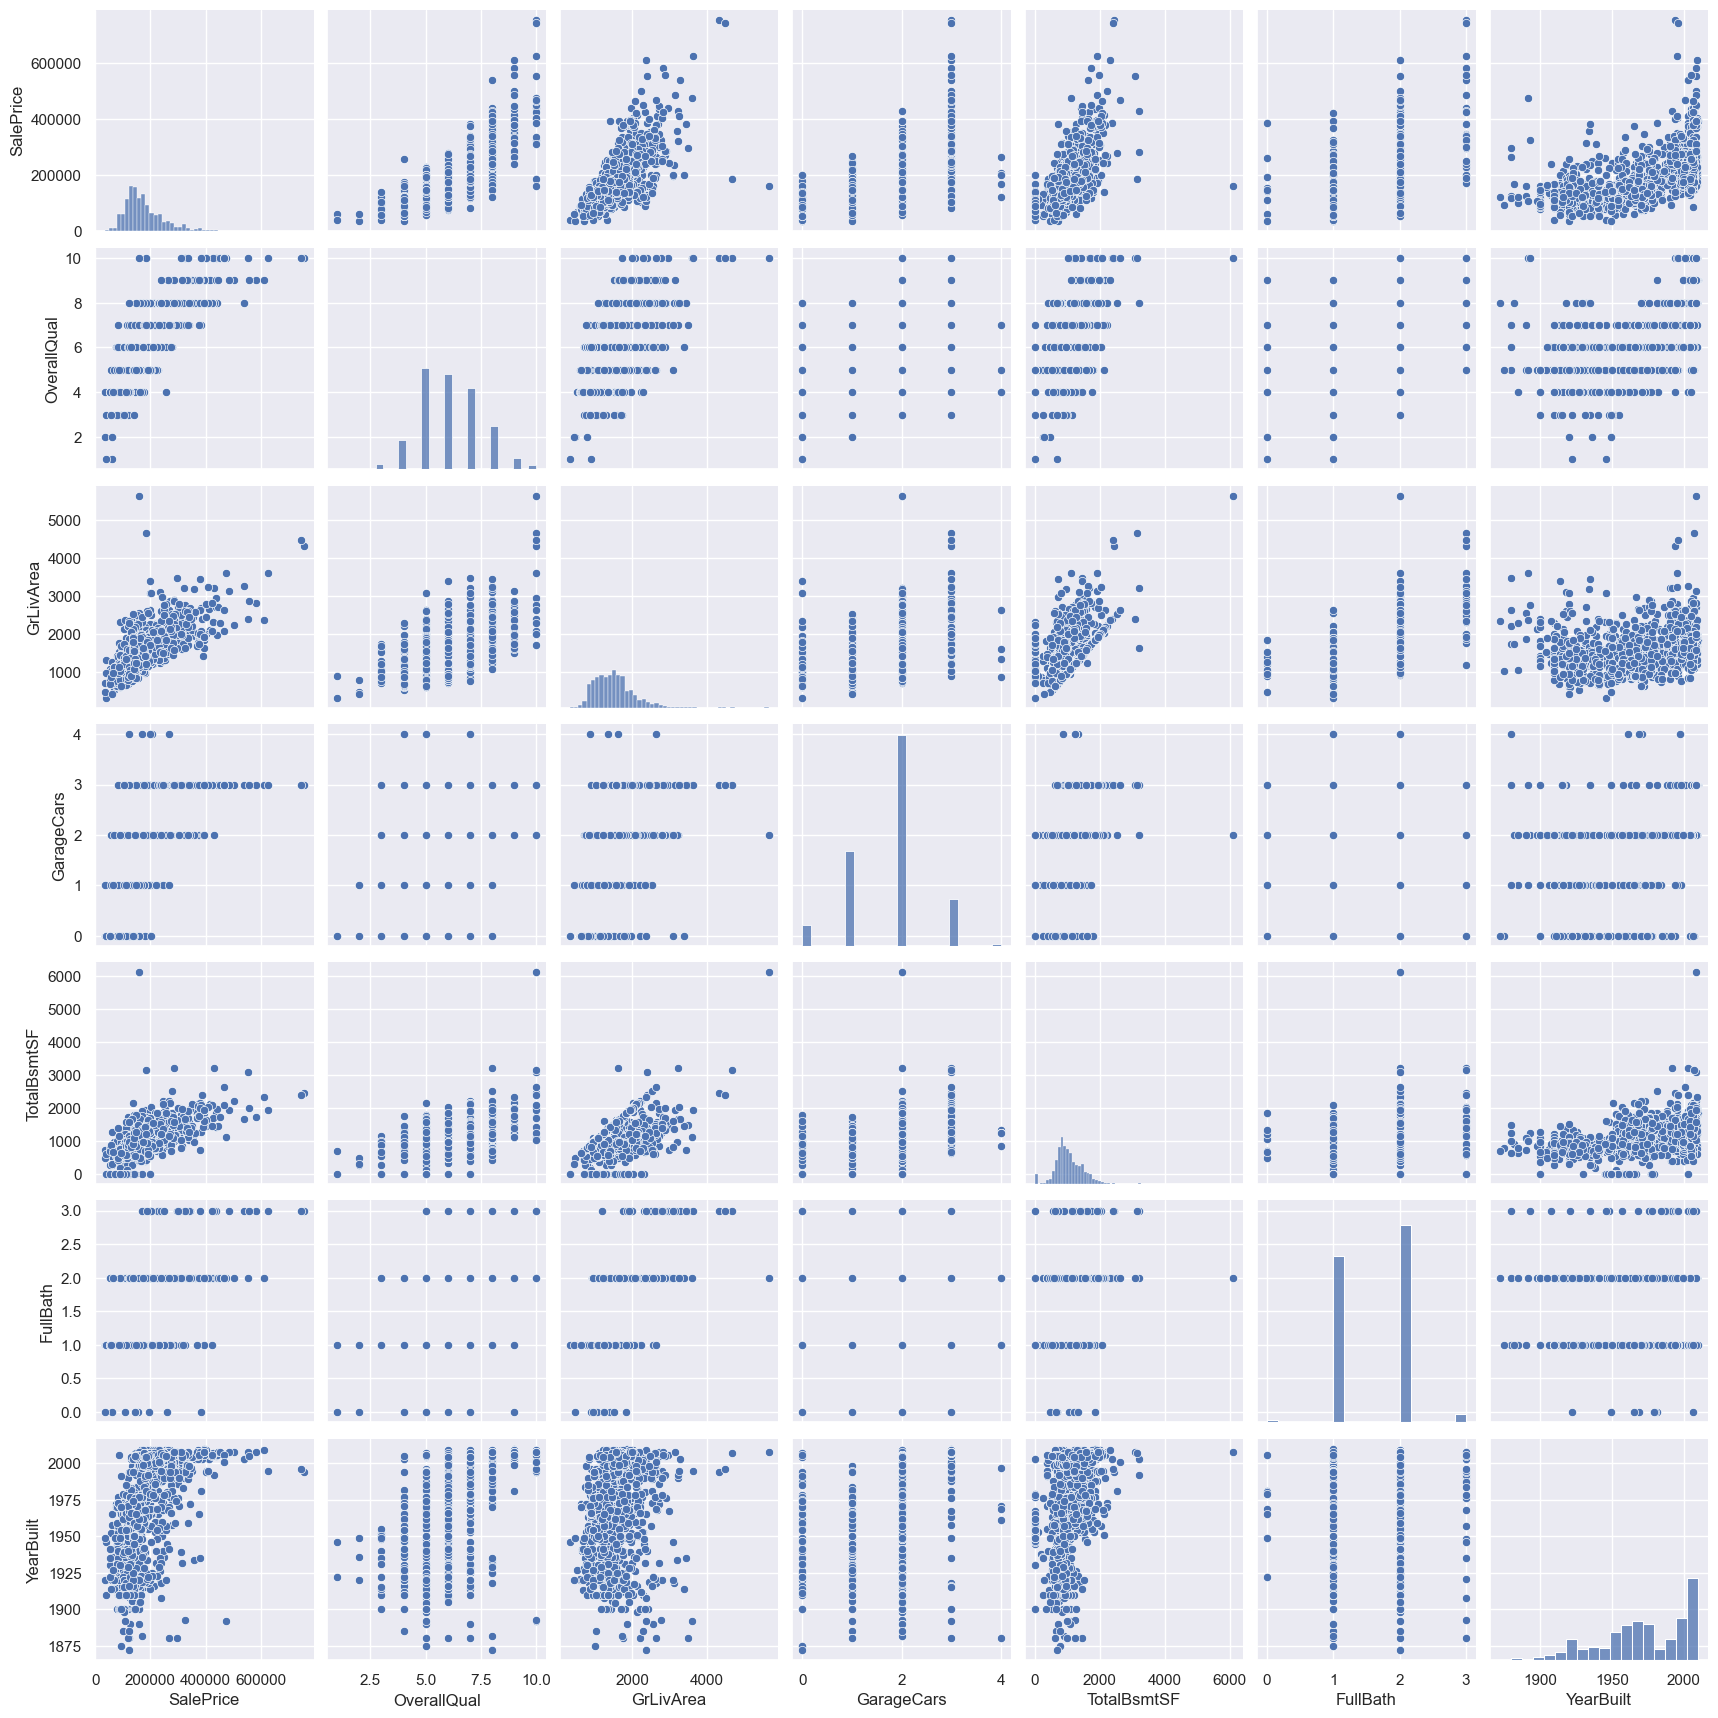

In [276]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();


In [277]:
# Les plus corrélées à SalesPrice sans être tricorrélées : 
# (Tous les B pour B dépend de A, Aucun C pour C dépend de B > C dépend de A)
df_selected = df[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]]
df_selected.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,856,2,2003
1,181500,6,1262,2,1262,2,1976
2,223500,7,1786,2,920,2,2001
3,140000,7,1717,3,756,1,1915
4,250000,8,2198,3,1145,2,2000


In [278]:
from sklearn import tree

y = df_selected["SalePrice"].to_numpy().reshape(-1, 1)
X = df_selected[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]].to_numpy()

clf = tree.DecisionTreeRegressor()
clf.fit(X, y)

DecisionTreeRegressor()

In [279]:
clf.score(X, y)

0.9997235685830909

In [280]:
# tree.plot_tree(clf)

In [281]:
df_test = pd.read_csv("advanced/test.csv")
X = df_test[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]].to_numpy()
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [282]:
y_pred = clf.predict(X)
y_pred.dtype

dtype('float64')

In [283]:
df_test["SalePrice"] = y_pred
df_pred = df_test[["Id", "SalePrice"]]
df_pred

,Id,SalePrice
0,1461,109500.0
1,1462,60000.0
2,1463,137000.0
3,1464,181000.0
4,1465,245500.0
...,...,...
1454,2915,81500.0
1455,2916,81500.0
1456,2917,140000.0
1457,2918,93500.0


In [284]:
df_pred.to_csv("prediction.csv", index=False)

In [285]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f prediction.csv -m first

/Users/strurphe/iim/python_and_ai/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
100%|██████████████████████████████████████| 19.8k/19.8k [00:00<00:00, 37.3kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques